# **SOLUCIÓN DEL PROFESOR - NO PUBLICAR**

# Maestría en Inteligencia Artificial Aplicada

## Curso: Inteligencia Artificial y Aprendizaje Automático

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad de las Semanas 5 y 6
### **Problema de asignación de créditos: South German Dataset.**


## **Nombres y matrículas:**



*   Nombre y matrícula

*   Nombre y matrícula



# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

In [50]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import RandomOverSampler


In [2]:
# Si se desean comentar algunos de los Warnings.
#import warnings
#warnings.filterwarnings("ignore")

In [3]:
# Carga y renombra los nombres de las columnas del alemán al inglés y desplegamos
# de nuevo el DataFrame para ver el resultado obtenido:

# ************* Inlcuye aquí tu código:*****************************


PATH = "../files/SouthGermanCredit.asc"
df = pd.read_csv(PATH, sep=" ")

df.rename(columns={"laufkont" : "status", "laufzeit": "duration", "moral" : "credit_history",
                   "verw" : "purpose", "hoehe" :"amount","sparkont" : "savings",
                   "beszeit" : "employment_duration", "rate" : "installment_rate",
                   "famges" : "personal_status_sex","buerge" : "other_debtors",
                   "wohnzeit" : "present_residence", "verm" : "property", "alter" : "age",
                   "weitkred" : "other_installment_plans", "wohn" : "housing",
                   "bishkred" : "number_credits", "beruf" : "job", "pers" : "people_liable",
                   "telef" : "telephone", "gastarb" : "foreign_worker", "kredit" : "credit_risk"},
                    inplace = True)

display(df)
# *********** Aquí termina la sección de agregar código *************

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


## **Ejercicio 2**

In [4]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0. Realiza a continuación una transformación para que la
# clase negativa (buen cliente) quede ahora con el valor de 0 y la clase positiva (mal cliente) quede con el valor de 1.

# ************* Inlcuye aquí tu código:*****************************

print(df["credit_risk"].value_counts())

df["credit_risk"] = (df["credit_risk"] - 1) * -1

# *********** Aquí termina la sección de agregar código *************


print(df["credit_risk"].value_counts())

credit_risk
1    700
0    300
Name: count, dtype: int64
credit_risk
0    700
1    300
Name: count, dtype: int64


## **Ejercicio 3**

In [5]:
# Realiza una partición de 70-15-15 en entrenamiento, validación y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************
X = df.drop(columns=["credit_risk"])
y = df["credit_risk"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=42)



# *********** Aquí termina la sección de agregar código *************


# Mostremos las dimensiones de la partición generada:
print("Dimensiones:")
print("Entrenamiento:", Xtrain.shape, ytrain.shape)
print("Validación:", Xval.shape, yval.shape)
print("Prueba:", Xtest.shape, ytest.shape)

# Y el porcentaje de cada clase de la variable de salida:
tmp = ytrain.sum()/ytrain.shape[0]
print("\nPorcentaje clases Positiva:%.2f%%, y Negativa:%.2f%%" % (100*(1-tmp),tmp*100))


Dimensiones:
Entrenamiento: (700, 20) (700,)
Validación: (150, 20) (150,)
Prueba: (150, 20) (150,)

Porcentaje clases Positiva:70.29%, y Negativa:29.71%


### **Con base al porcentaje de los niveles de la variable de salida ¿podemos decir que tenemos un problema de datos desbalanceado? ¿Por qué?**



### ++++++++ Inicia la sección de agregar texto: +++++++++++

En este caso sí tenemos un problema de datos desvalanceados ya que hay más datos de clase negativa, de los datos de entrenamiento la gran mayoría son negativos cas con el 70% mientras que la clase positiva es casi del 30%

### ++++++++ Termina la sección de agregar texto: +++++++++++



## **Ejercicio 4**

### **Describe a continuación la información de cada variable: su descripción, el tipo de variable y para el caso de las categóricas, el total de niveles.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


### **6 Variables de entrada Categóricas Nominales:**

*   **credit_history (total de niveles):** history of compliance with previous or concurrent credit contracts.
>>0 : delay in paying off in the past, 1 : critical account/other credits elsewhere, 2 : no credits taken/all credits paid back duly, 3 : existing credits paid back duly till now, 4 : all credits at this bank paid back duly

*   **purpose (total de niveles):** purpose for which the credit is needed.
>> 0 : others, 1 : car (new), 2 : car (used), 3 : furniture/equipment, 4 : radio/television,  5 : domestic appliances, 6 : repairs, 7 : education, 8 : vacation, 9 : retraining, 10 : business 

*   **personal_status_sex (total de niveles):** combined information on sex and marital status; categorical; sex cannot be recovered from the variable, because male singles and female non-singles are coded with the same code (2); female widows cannot be easily classified, because the code table does not list them in any of the female categories.
>> 1 : male : divorced/separated, 2 : female : non-single or male : single, 3 : male : married/widowed,  4 : female : single

*   **other_debtors (total de niveles):** Is there another debtor or a guarantor for the credit?
>> 1 : none, 2 : co-applicant, 3 : guarantor 

*   **other_installment_plans (total de niveles):** installment plans from providers other than the credit-giving bank
>>1 : bank, 2 : stores, 3 : none

*   **housing (total de niveles):** type of housing the debtor lives in
>>  1 : for free, 2 : rent, 3 : own 



### **4 Variables Categóricas Binarias (3 de entrada y 1 de salida):**

*   **people_liable:** number of persons who financially depend on the debtor
>> 1 : 3 or more, 2 : 0 to 2 

*   **telephone:** Is there a telephone landline registered on the debtor's name?
>> 1 : no, 2 : yes (under customer name)


*   **foreign_worker:** Is the debtor a foreign worker?
>> 1 : yes, 2 : no 


*   **credit_risk: (Variable de salida)** history of compliance with previous or concurrent credit contracts
>> 0 : bad, 1 : good


### **5 Variables Categóricas Ordinales (Cuantitativas Discretas + Strings):**

#### NOTA: Estas variables están formadas por niveles que contienen intervalos numéricos y de texto.


*   **status (total de niveles):** status of the debtor's checking account with the bank.
>> 1 : no checking account, 2 : ... < 0 DM, 3 : 0<= ... < 200 DM, 4 : ... >= 200 DM / salary for at least 1 year

*   **savings (total de niveles):** debtor's savings.
>> 1 : unknown/no savings account, 2 : ... <  100 DM, 3 : 100 <= ... <  500 DM, 4 : 500 <= ... < 1000 DM, 5 : ... >= 1000 DM

*   **employment_duration (total de niveles):** duration of debtor's employment with current employer (ordinal; discretized quantitative).
>>  1 : unemployed, 2 : < 1 yr, 3 : 1 <= ... < 4 yrs, 4 : 4 <= ... < 7 yrs, 5 : >= 7 yrs 

*   **property (total de niveles):** the debtor's most valuable property, i.e. the highest possible code is used. Code 2 is used, if codes 3 or 4 are not applicable and there is a car or any other relevant property that does not fall under variable sparkont.
>> 1 : unknown / no property, 2 : car or other, 3 : building soc. savings agr./life insurance, 
 4 : real estate

*   **job (total de niveles):** quality of debtor's job
>> 1 : unemployed/unskilled - non-resident, 2 : unskilled - resident, 3 : skilled employee/official,  4 : manager/self-empl./highly qualif. employee

### **3 Variables Categóricas Ordinales:**
### NOTA: Estas categóricas ordinales están formadas solo por intervalos numéricos.

*   **installment_rate (total de niveles):** credit installments as a percentage of debtor's disposable income
>>1 : >= 35, 2 : 25 <= ... < 35,  3 : 20 <= ... < 25,  4 : < 20

*   **present_residence (total de niveles):** length of time (in years) the debtor lives in the present residence
>>1 : < 1 yr, 2 : 1 <= ... < 4 yrs, 3 : 4 <= ... < 7 yrs, 4 : >= 7 yrs 

*   **number_credits (total de niveles):** number of credits including the current one the debtor has (or had) at this bank (ordinal, discretized
quantitative)

>> 1 : 1, 2 : 2-3, 3 : 4-5 , 4 : >= 6


### **3 Variables Numéricas reales o flotantes:**
*   **duration:** credit duration in months.
*   **amount:** credit amount in DM.
*   **age:** age in years.


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 5**

### Análisis descriptivo de las variables usando el conjunto de entrenamiento.

### Incluye a continuación todo el código que consideres necesario para analizar las variables y decidir en dado caso qué transformaciones les estarías aplicando.

In [6]:
ytrain.describe()

count    700.000000
mean       0.297143
std        0.457327
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: credit_risk, dtype: float64

In [7]:
Xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
status,700.0,2.587143,1.258837,1.0,1.00,2.0,4.00,4.0
duration,700.0,21.308571,12.139706,4.0,12.00,18.0,24.50,72.0
credit_history,700.0,2.548571,1.077371,0.0,2.00,2.0,4.00,4.0
purpose,700.0,2.872857,2.783480,0.0,1.00,2.0,3.00,10.0
amount,700.0,3319.404286,2830.077730,276.0,1346.75,2330.0,4212.75,18424.0
savings,700.0,2.081429,1.576998,1.0,1.00,1.0,3.00,5.0
employment_duration,700.0,3.380000,1.217963,1.0,3.00,3.0,5.00,5.0
installment_rate,700.0,2.990000,1.104633,1.0,2.00,3.0,4.00,4.0
personal_status_sex,700.0,2.675714,0.713037,1.0,2.00,3.0,3.00,4.0
other_debtors,700.0,1.137143,0.464528,1.0,1.00,1.0,1.00,3.0


In [8]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 541 to 102
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   700 non-null    int64
 1   duration                 700 non-null    int64
 2   credit_history           700 non-null    int64
 3   purpose                  700 non-null    int64
 4   amount                   700 non-null    int64
 5   savings                  700 non-null    int64
 6   employment_duration      700 non-null    int64
 7   installment_rate         700 non-null    int64
 8   personal_status_sex      700 non-null    int64
 9   other_debtors            700 non-null    int64
 10  present_residence        700 non-null    int64
 11  property                 700 non-null    int64
 12  age                      700 non-null    int64
 13  other_installment_plans  700 non-null    int64
 14  housing                  700 non-null    int64
 15  number_cr


### **Describe y explica a continuación las transformaciones que has decidido aplicar a cada columna:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

- Para las variables numéricas, se decide un análisis de standard scaler.
- Para las variables categoricas nominales, se decide una transformación one hot encoding

### ++++++++ Termina la sección de agregar texto. +++++++++++


# **Parte II: Modelos de aprendizaje automático con los conjuntos originales de la partición realizada.**

## **Ejercicio 6**

In [9]:
# Transformaciones que se aplicarán a las variables numéricas usando la clase Pipeline de sklearn:

# ************* Inlcuye aquí tu código:*****************************
num_columns = ["duration", "amount", "age"]

cat_columns = ["credit_history", "purpose", "personal_status_sex", "other_debtors",
               "other_installment_plans", "housing"]

# Variables numéricas:
num_pipe = Pipeline([('scaler', StandardScaler())])
num_pipe_nombres = ["numericalEncoder"]



# Variables categóricas-Nominales:
cat_pipe = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])
cat_pipe_nombres = ["nominalEncoder"]


# Conjuntemos las transformaciones de todo tipo de variable y
# dejamos sin procesar aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer([
    ("numericalEncoder", num_pipe, num_columns),
    ("nominalEncoder", cat_pipe, cat_columns)])



# *********** Aquí termina la sección de agregar código *************


## **Ejercicio 7**

In [10]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y validación
# en uno nuevo conjunto aumentado que llamaremos trainval para utilizar como entrenamiento:

# ************* Inlcuye aquí tu código:**************************

Xtrainval = pd.concat([Xtrain, Xval])
ytrainval = pd.concat([ytrain, yval])

# *********** Aquí termina la sección de agregar código *************


# Veamos cuántas varaibles nuevas se introducen con las transformaciones One-Hot-Encoding:
Xtmp = Xtrainval.copy()
tmp = columnasTransformer.fit_transform(Xtmp)
print("Dimensión de las variables de entrada ANTES de las transformaciones:", Xtmp.shape)
print("Dimensión de las variables de entrada DESPUÉS de las transformaciones:", tmp.shape)

Dimensión de las variables de entrada ANTES de las transformaciones: (850, 20)
Dimensión de las variables de entrada DESPUÉS de las transformaciones: (850, 31)


## **Ejercicio 8**

In [36]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.


def mis_modelos():
  modelos, nombres = list(), list()


  # ************* Inlcuye aquí tu código:**************************
  #
  # Deberás incluir en cada modelo los argumentos que consideres
  # adecuados para que cada uno converja y no esté sobreentrenado
  # con respecto a la métrica de la exatitud (accuracy).


  # Regresión Logística - Logistic Regression-LR:
  # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
  modelos.append(LogisticRegression( solver = "saga", class_weight = "balanced"))
  nombres.append("LR")
  # k-Vecinos más Cercanos : k-Nearest-Neighbors-kNN:
  # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
  modelos.append(KNeighborsClassifier( n_neighbors = 8 , weights = "distance", algorithm = "brute"))
  nombres.append("kNN")
  # Árbol de decisiones-DecisionTree-DT:
  # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
  modelos.append(DecisionTreeClassifier( criterion = "entropy", splitter = "random"))
  nombres.append("DTree")
  # Bosque Aleatorio-RandomForest-RF:
  # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  modelos.append(RandomForestClassifier( n_estimators = 150, criterion = "log_loss"))
  nombres.append("RF")
  # XGBoosting:
  # https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier
  # https://xgboost.readthedocs.io/en/stable/parameter.html
  modelos.append(XGBClassifier())
  nombres.append("XGBoost")
  # Red neuronal de Perceptrón Multicapa-MLP:
  # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
  modelos.append(MLPClassifier())
  nombres.append("MLP")
  # Máquina de Vectores de Soporte-SVM:
  # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
  modelos.append(SVC( kernel = "poly", degree = 2))
  nombres.append("SVM")
  # *********** Aquí termina la sección de agregar código *******************



  return modelos, nombres

In [39]:

# Entrenamos cada uno de los modelos y desplegamos la métricas de Train y Val.

# NOTA: Observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test":
warnings.filterwarnings("ignore")

modelos, nombres = mis_modelos()
resultados = list()
resultados_precision = {}

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[("ct",columnasTransformer),("m",modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5,
                                 n_repeats=3,
                                 random_state=5     # agreguemos una semilla para estabilizar resultados.
                                 )


  # Definimos las métricas que desamos recuperar:
  mismetricas = ["accuracy","precision","recall","f1"]   

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelo para análisis posteriores.
  resultados.append(scores)
  resultados_precision[nombres[i]] = scores["test_precision"]

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print(">> %s" % nombres[i])
  for j,k in enumerate(list(scores.keys())):
      if j>1:
          print("\t %s %.3f (%.3f)" % (k, np.mean(scores[k]),np.std(scores[k])))

>> LR
	 test_accuracy 0.680 (0.023)
	 train_accuracy 0.698 (0.011)
	 test_precision 0.477 (0.028)
	 train_precision 0.499 (0.014)
	 test_recall 0.633 (0.051)
	 train_recall 0.670 (0.015)
	 test_f1 0.543 (0.028)
	 train_f1 0.572 (0.014)
>> kNN
	 test_accuracy 0.709 (0.031)
	 train_accuracy 1.000 (0.000)
	 test_precision 0.536 (0.101)
	 train_precision 1.000 (0.000)
	 test_recall 0.264 (0.066)
	 train_recall 1.000 (0.000)
	 test_f1 0.352 (0.077)
	 train_f1 1.000 (0.000)
>> DTree
	 test_accuracy 0.669 (0.035)
	 train_accuracy 1.000 (0.000)
	 test_precision 0.448 (0.057)
	 train_precision 1.000 (0.000)
	 test_recall 0.440 (0.080)
	 train_recall 1.000 (0.000)
	 test_f1 0.443 (0.066)
	 train_f1 1.000 (0.000)
>> RF
	 test_accuracy 0.720 (0.025)
	 train_accuracy 1.000 (0.000)
	 test_precision 0.567 (0.068)
	 train_precision 1.000 (0.000)
	 test_recall 0.321 (0.064)
	 train_recall 1.000 (0.000)
	 test_f1 0.406 (0.062)
	 train_f1 1.000 (0.000)
>> XGBoost
	 test_accuracy 0.698 (0.028)
	 train_acc

## **Ejercicio 9**

### **De acuerdo a la información de la matriz de costo dada en la documentación del problema, contesta las siguientes preguntas:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

a.   ¿Qué error se considera más costoso por parte del banco? ¿FP o FN? Justifica tu respuesta.

Los errores de la matriz de costo de la documentación dicen que los errores más costosos para los créditos son los falsos positivos, ya que lo peor que se puede hacer es clasificar a un cliente como bueno cuando son malos.

b.   ¿Cuál o cuáles serían entonces las métricas a considerar como más importantes? Justifica tu respuesta.

La métrica más importante que considero para el problema es la de la precisión porque el costo de un falso positivo es alto y esta métrica nos mide el número de verdaderos positivos, dividio por el número de verdaderos positivos más los falsos positivos. Una precisión alta nos ayuda a minimizar el riesgo de otorgar préstamos a clientes que probablemente no paguen.



### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 10**

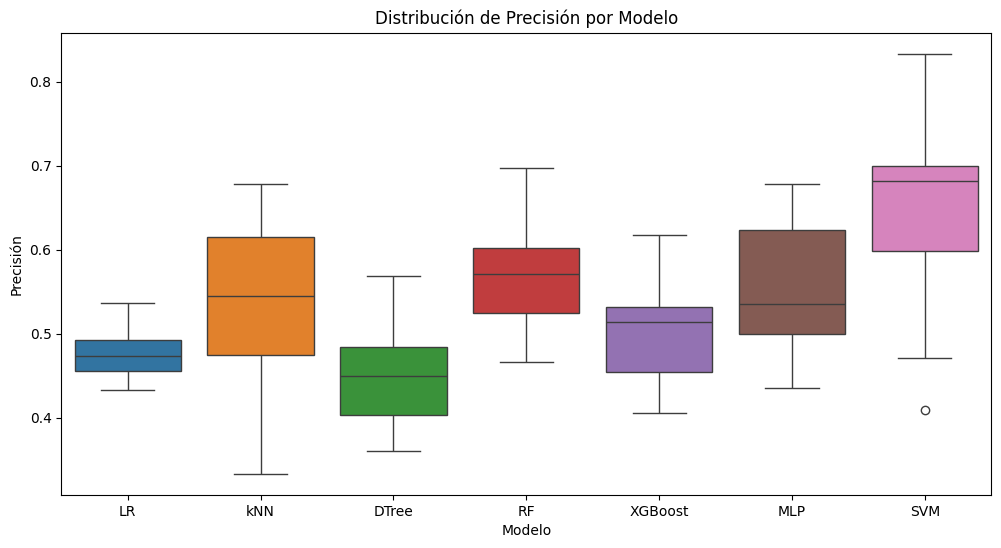

In [47]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos,
# utilizando los resultados obtenidos con la métrica que consideraste más importante
# en el ejercicio anterior:


# ************* Inlcuye aquí tu código:**************************

df_precision = pd.DataFrame(resultados_precision)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_precision)
plt.title("Distribución de Precisión por Modelo")
plt.xlabel("Modelo")
plt.ylabel("Precisión")
plt.show()

# *********** Aquí termina la sección de agregar código *************


### **Incluye tus conclusiones al respecto, en particular indica cuáles consideras son los mejores modelos obtenidos.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

El mejor modelo de los anteriores es el de SVM ya que este tiene su mediana de datos de precisión casi en el máximo de los otros modelos y su umbral de precisión es más alto que los demás, teniendo su rango de precisión más alto que los otros modelos. Así teniendo más consistencia este modelo.

### ++++++++ Termina la sección de agregar texto: +++++++++++



# **Parte III: Modelos con técnicas para clases no balanceadas.**

## **Ejercicio 11**

In [52]:
# Selecciona una técnica de sobremuestreo y/o submuestreo
# para clases no balanceadas que consideres adecuada.



# ************* Inlcuye aquí tu código:**************************

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(Xtrainval, ytrainval)


warnings.filterwarnings("ignore")

modelos, nombres = mis_modelos()
resultados = list()
resultados_precision = {}

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[("ct",columnasTransformer),("m",modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5,
                                 n_repeats=3,
                                 random_state=5     # agreguemos una semilla para estabilizar resultados.
                                 )


  # Definimos las métricas que desamos recuperar:
  mismetricas = ["accuracy","precision","recall","f1"]   

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          X_train_resampled,
                          y_train_resampled,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelo para análisis posteriores.
  resultados.append(scores)
  resultados_precision[nombres[i]] = scores["test_precision"]

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print(">> %s" % nombres[i])
  for j,k in enumerate(list(scores.keys())):
      if j>1:
          print("\t %s %.3f (%.3f)" % (k, np.mean(scores[k]),np.std(scores[k])))
# *********** Aquí termina la sección de agregar código *************


>> LR
	 test_accuracy 0.668 (0.031)
	 train_accuracy 0.690 (0.010)
	 test_precision 0.675 (0.029)
	 train_precision 0.698 (0.009)
	 test_recall 0.647 (0.054)
	 train_recall 0.669 (0.013)
	 test_f1 0.660 (0.039)
	 train_f1 0.683 (0.011)
>> kNN
	 test_accuracy 0.798 (0.029)
	 train_accuracy 1.000 (0.000)
	 test_precision 0.746 (0.031)
	 train_precision 1.000 (0.000)
	 test_recall 0.908 (0.032)
	 train_recall 1.000 (0.000)
	 test_f1 0.818 (0.024)
	 train_f1 1.000 (0.000)
>> DTree
	 test_accuracy 0.811 (0.030)
	 train_accuracy 1.000 (0.000)
	 test_precision 0.767 (0.034)
	 train_precision 1.000 (0.000)
	 test_recall 0.896 (0.026)
	 train_recall 1.000 (0.000)
	 test_f1 0.826 (0.025)
	 train_f1 1.000 (0.000)
>> RF
	 test_accuracy 0.851 (0.024)
	 train_accuracy 1.000 (0.000)
	 test_precision 0.816 (0.025)
	 train_precision 1.000 (0.000)
	 test_recall 0.907 (0.026)
	 train_recall 1.000 (0.000)
	 test_f1 0.859 (0.023)
	 train_f1 1.000 (0.000)
>> XGBoost
	 test_accuracy 0.840 (0.023)
	 train_acc

## **Ejercicio 12**

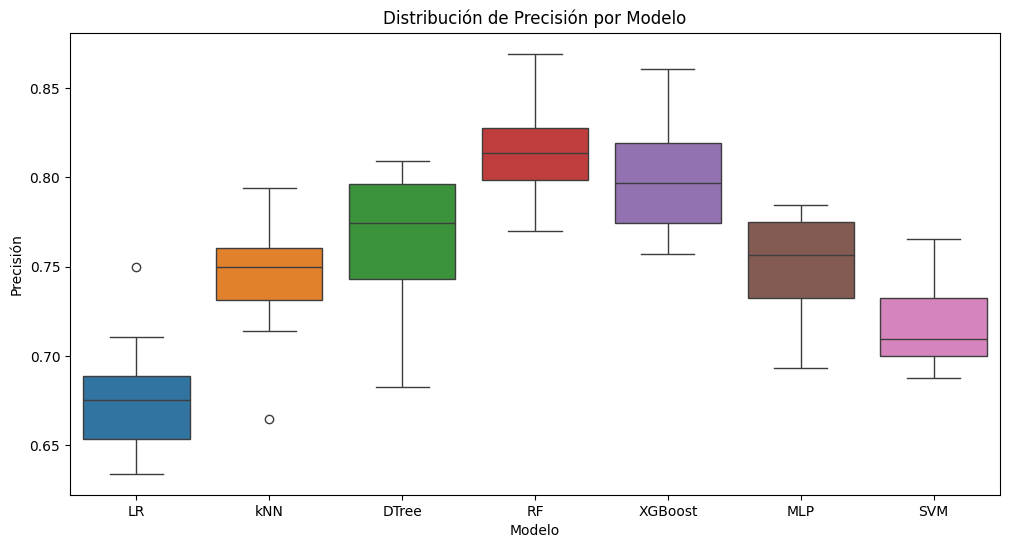

In [53]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos,
# que incluye submuestreo y/o sobremuestreo:


# ************* Inlcuye aquí tu código:**************************

df_precision = pd.DataFrame(resultados_precision)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_precision)
plt.title("Distribución de Precisión por Modelo")
plt.xlabel("Modelo")
plt.ylabel("Precisión")
plt.show()


# *********** Aquí termina la sección de agregar código *************

# **Parte IV: Mejor modelo**

## **Ejercicio 13**

### **Selecciona y justifica cuál consideras es el mejor modelo que has obtenido hasta ahora.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Al utilizar una técnica de sobremuetreo para las clases no balanceadas. Se obtuvo que el mejor modelo fue el de Random Forest donde su mediana de precisión fue el más alto junto con cuartiles más altos que los demás modelos y valores mínimos y máximos más altos que los demás.

### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 14**

In [ ]:
# Incluye aquí tu mejor modelo. Verifica que tu modelo no esté sobreentrenado
# e indica cuáles son los mejores valores obtenidos de los hiperparámetros.


# Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio anterior,
# utiliza ahora (por primera vez en la actividad) el conjunto de prueba (test set) para:

# a.	Mejor modelo con los mejores hiperparámetros y el conjunto de prueba.


# ************* Inlcuye aquí tu código:**************************

None

# *********** Aquí termina la sección de agregar código *************


In [ ]:
# b.	Obtener la matriz de confusión y el classification_report().

# ************* Inlcuye aquí tu código:**************************

None


# *********** Aquí termina la sección de agregar código *************

In [ ]:
# c.	Realiza un análisis de importancia de variables (feature importance) de este
#     mejor modelo e incluye tus conclusiones al respecto.

# ************* Inlcuye aquí tu código:**************************

None


# *********** Aquí termina la sección de agregar código *************


### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 15**

### **Escribe tus conclusiones finales de la actividad.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None


### ++++++++ Termina la sección de agregar texto. +++++++++++


>> ### **Fin de la Actividad de las Semanas 5 y 6.**